**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df=pd.read_csv("cleaned_data.csv")

In [4]:
# Define the sigmoid function
def sigmoid(X):
    Y=1/(1+np.exp(-X))
    return Y
    


Text(0.5, 1.0, 'The sigmoid function')

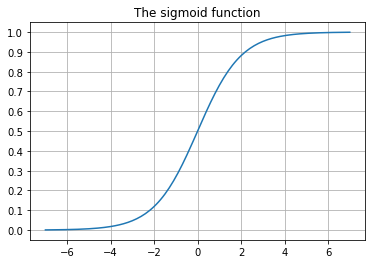

In [5]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [6]:
# Create a train/test split
X = df[['PAY_1','LIMIT_BAL']]
y= df['default payment next month']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.solver='liblinear'

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [8]:
# Fit the logistic regression model on training data
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Make predictions using `.predict()`
y_pred =lr.predict(X_test)

In [10]:
# Find class probabilities using `.predict_proba()`
from sklearn import metrics
y_pred_proba =  lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [11]:
# Add column of 1s to features
lr.coef_

array([[ 8.27451187e-11, -6.80876727e-06]])

In [12]:
# Get coefficients and intercepts from trained model
theta0 = lr.intercept_
theta1 = lr.coef_[0][0]
theta2 = lr.coef_[0][1]

In [13]:
# Manually calculate predicted probabilities
temp = theta0 + theta1*X_test['PAY_1'] + theta2*X_test['LIMIT_BAL']
predicted_probabilities = sigmoid(temp)
predicted_probabilities

14306    0.251731
2978     0.415703
16641    0.203955
18580    0.203955
131      0.415703
16264    0.079354
25422    0.079354
26218    0.336066
3773     0.264771
22974    0.239124
22001    0.367095
12051    0.432330
23964    0.203955
8231     0.466009
2090     0.203955
15620    0.114799
15510    0.336066
240      0.367095
10635    0.154179
21066    0.399266
23442    0.367095
23474    0.069958
9763     0.172785
11262    0.415703
15805    0.251731
11654    0.482985
6824     0.351423
14728    0.449111
1006     0.466009
18759    0.367095
           ...   
10886    0.415703
8727     0.367095
8470     0.432330
9226     0.203955
4956     0.264771
13819    0.415703
14463    0.032159
5107     0.039161
965      0.032159
12548    0.449111
16691    0.278236
3995     0.163269
18592    0.449111
2032     0.182735
15089    0.278236
15973    0.030106
13629    0.163269
25036    0.466009
7235     0.415703
1411     0.114799
12544    0.203955
12665    0.251731
23088    0.057780
7920     0.449111
23201    0

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [14]:
# Manually calculate predicted classes
threshold_mask = predicted_probabilities>=0.5
final_pred = []
for i in threshold_mask:
    if i==True:
        final_pred.append(1)
    else:
        final_pred.append(0)

final_pred


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [15]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
ROC_AUC_SCORE = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
ROC_AUC_SCORE

0.627207450280691